In [63]:
!pip install matplotlib numpy opencv-python tensorflow scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [64]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from scipy.stats import pearsonr

In [65]:
# Define dataset paths
dataset_path = "../Dataset/neutral"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Define noisy dataset paths
noisy_dataset_path = "../Dataset/neutral/noisy"
noisy_train_path = os.path.join(noisy_dataset_path, "train")
noisy_test_path = os.path.join(noisy_dataset_path, "test")

# Ensure noisy dataset directories exist
for path in [noisy_train_path, noisy_test_path]:
    if not os.path.exists(path):
        os.makedirs(path)

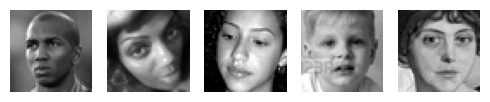

In [66]:
def display_sample_images(folder_path, num_images=5):
    categories = os.listdir(folder_path)
    fig, axes = plt.subplots(1, num_images, figsize=(5, 5))

    # for i, category in enumerate(categories):
    #     category_path = os.path.join(folder_path, category)
    #     image_files = os.listdir(category_path)[:num_images]

    #     for j, image_file in enumerate(image_files):
    #         img_path = os.path.join(category_path, image_file)
    #         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
    #         img = cv2.resize(img, (48, 48)) 

    #         axes[i, j].imshow(img, cmap='gray')
    #         axes[i, j].axis("off")

    #     axes[i, 0].set_ylabel(category, fontsize=12)

    category_path = folder_path
    image_files = os.listdir(category_path)[:num_images]

    for j, image_file in enumerate(image_files):
        img_path = os.path.join(category_path, image_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (48, 48)) 
        
        axes[j].imshow(img, cmap='gray')
        axes[j].axis("off")

    axes[0].set_ylabel("neutral", fontsize=12)

    plt.tight_layout()
    plt.show()

display_sample_images(train_path, num_images=5)


In [67]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std=0.1):  
    noise = np.random.normal(mean, std, image.shape) 
    
    #noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = 255*(image + noise) # Add noise to the image
    return noisy_image

# Function to process images and save noisy versions
def process_images(input_folder, output_folder, category=""):
    category_path = input_folder
    noisy_category_path = os.path.join(output_folder, category)

    # Ensure category subfolder exists in noisy images
    if not os.path.exists(noisy_category_path):
        os.makedirs(noisy_category_path)

    # Process images inside category folder
    image=""
    for img_name in tqdm(os.listdir(category_path), desc=f"Processing {category} in {output_folder}"):
        img_path = os.path.join(category_path, img_name)
        noisy_img_path = os.path.join(noisy_category_path, img_name)

        # Read and process image
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue  # Skip unreadable images
    
        image = image/255;  
        noisy_image = add_gaussian_noise(image)

        # Save noisy image
        cv2.imwrite(noisy_img_path, noisy_image)
    print(image)
    print(noisy_image)
# Apply noise to both train and test datasets for neutral category
process_images(train_path, noisy_train_path, category="")
process_images(test_path, noisy_test_path, category="")

print("✅ Noisy images successfully generated and saved in 'FER2013_Noisy_Images' folder.")

Processing  in ../Dataset/neutral/noisy/train: 100%|██████████| 106/106 [00:00<00:00, 4740.99it/s]


[[0.54509804 0.54509804 0.54901961 ... 0.53333333 0.5254902  0.5372549 ]
 [0.55294118 0.54117647 0.56470588 ... 0.54117647 0.5372549  0.52941176]
 [0.55686275 0.55686275 0.54509804 ... 0.52941176 0.5254902  0.5372549 ]
 ...
 [0.58823529 0.56470588 0.55686275 ... 0.5254902  0.54117647 0.57647059]
 [0.58431373 0.57647059 0.55686275 ... 0.54509804 0.56078431 0.57254902]
 [0.59215686 0.58431373 0.56470588 ... 0.4627451  0.56862745 0.57254902]]
[[140.62470838 126.04797086 111.66106593 ...  89.27690254 141.04809073
  150.96894711]
 [149.63961822 154.25275843 168.52596636 ... 139.81588097 120.02472207
  125.38830742]
 [119.42887118 118.8248332  138.98067002 ... 157.91291753 160.82560091
  153.84887849]
 ...
 [161.64873336 133.22258304 126.20346352 ... 135.9670018  129.93671253
  137.60752891]
 [171.22204862 161.96267316 152.45594971 ...  86.27938535 113.19660823
  168.53213329]
 [139.19263481 143.59878232 140.27932635 ... 119.95478142 131.80121335
  134.17358748]]


Processing  in ../Dataset/neutral/noisy/test: 100%|██████████| 15/15 [00:00<00:00, 6047.73it/s]

[[0.18039216 0.19215686 0.19607843 ... 0.43137255 0.40784314 0.41960784]
 [0.18823529 0.19607843 0.2        ... 0.42745098 0.43529412 0.41960784]
 [0.20392157 0.20784314 0.22352941 ... 0.43529412 0.43137255 0.44313725]
 ...
 [0.45882353 0.51372549 0.61960784 ... 0.42352941 0.5372549  0.40784314]
 [0.44313725 0.5372549  0.59607843 ... 0.4        0.56470588 0.44705882]
 [0.45882353 0.56470588 0.61960784 ... 0.34509804 0.54509804 0.5254902 ]]
[[ 25.81601078   9.77151206  87.2980497  ...  52.27465514 107.23251756
  123.68802172]
 [ 92.61263201   8.13990695 100.3604575  ...  83.65774268 125.05652228
  128.38857279]
 [ 45.73643296  82.76678984  23.42945052 ... 146.91989894  96.39751452
   32.10298195]
 ...
 [117.49952733 122.61948975 109.67391699 ... 110.70919767  86.33590832
   78.13633142]
 [151.68744001 151.63646284 143.67086691 ... 114.61718675 156.48327531
  111.44464057]
 [131.84804071 161.86195765 173.19533819 ... 112.00326438 159.9410714
  121.68939771]]
✅ Noisy images successfully g

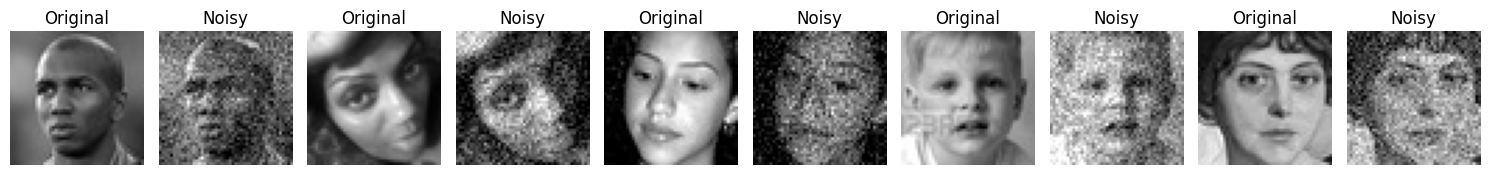

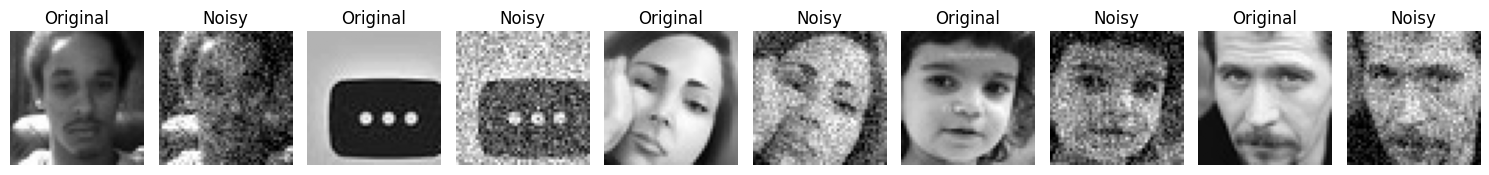

In [68]:
def display_original_and_noisy_images(original_folder, noisy_folder, num_images=5, category=""):
    original_category_path = os.path.join(original_folder, category)
    noisy_category_path = os.path.join(noisy_folder, category)

    if not os.path.exists(noisy_category_path):
        print(f"Skipping {category}, noisy folder not found.")
        return

    fig, axes = plt.subplots(1, num_images * 2, figsize=(15, 5))

    image_files = os.listdir(original_category_path)[:num_images]

    for j, image_file in enumerate(image_files):
        original_img_path = os.path.join(original_category_path, image_file)
        noisy_img_path = os.path.join(noisy_category_path, image_file)

        original_img = cv2.imread(original_img_path, cv2.IMREAD_GRAYSCALE)
        noisy_img = cv2.imread(noisy_img_path, cv2.IMREAD_GRAYSCALE)

        if original_img is None or noisy_img is None:
            continue  # Skip if images are unreadable

        original_img = cv2.resize(original_img, (48, 48))
        noisy_img = cv2.resize(noisy_img, (48, 48))

        # Show original image
        axes[j * 2].imshow(original_img, cmap='gray')
        axes[j * 2].axis("off")
        axes[j * 2].set_title("Original")

        # Show noisy image
        axes[j * 2 + 1].imshow(noisy_img, cmap='gray')
        axes[j * 2 + 1].axis("off")
        axes[j * 2 + 1].set_title("Noisy")

    plt.tight_layout()
    plt.show()

# Display original and noisy images for neutral category
display_original_and_noisy_images(train_path, noisy_train_path, num_images=5, category="")
display_original_and_noisy_images(test_path, noisy_test_path, num_images=5, category="")

In [69]:
def load_images(folder_path, category="", image_size=(48, 48)):
    data = []
    category_path = os.path.join(folder_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, image_size)
        data.append(img)
    return np.array(data).astype("float32") / 255.0  # Normalize images

# Load noisy and clean images for the "neutral" category
X_noisy = load_images(noisy_train_path, category="")
X_clean = load_images(train_path, category="")

print("Images Loaded successfully!")

Images Loaded successfully!


In [70]:
def build_dae():
    input_img = tf.keras.Input(shape=(48, 48, 1))

    # Encoder 
    x = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input_img)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)
    #x = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    #x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)
    #x = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
    #x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)

    # Decoder 
    #x = tf.keras.layers.Conv2DTranspose(256, (3, 3), activation="relu", padding="same")(x)
    #x = tf.keras.layers.UpSampling2D((2, 2))(x)
    #x = tf.keras.layers.Conv2DTranspose(128, (3, 3), activation="relu", padding="same")(x)
    #x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2DTranspose(64, (3, 3), activation="relu", padding="same")(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    output_img = tf.keras.layers.Conv2D(1, (3, 3), activation="linear", padding="same")(x)

    model = tf.keras.Model(input_img, output_img)
    model.compile(optimizer="adam", loss="mse")
    
    return model

# Build the DAE model
dae = build_dae()
dae.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 24, 24, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 48, 48, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,145 (149.00 KB)

 Trainable params: 38,145 (149.00 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold

# K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_val_loss = float("inf")

# Build the model once
dae = build_dae()
initial_weights = dae.get_weights()  # Store initial weights

for train_idx, val_idx in kf.split(X_noisy):
    X_train_fold, X_val_fold = X_noisy[train_idx], X_noisy[val_idx]
    y_train_fold, y_val_fold = X_clean[train_idx], X_clean[val_idx]

    #dae.set_weights(initial_weights)  # Reset weights instead of re-building

    checkpoint = ModelCheckpoint("temp_best_model.keras", monitor="val_loss", save_best_only=True, verbose=0)
    history = dae.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32,
                      validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=0)

    dae.load_weights("temp_best_model.keras")  # Load best weights for this fold
    val_loss = min(history.history["val_loss"])

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        dae.save("best_dae_model.keras")  # Save the best model

print("Best model saved as 'best_dae_model.keras'")


Best model saved as 'best_dae_model.keras'


In [72]:
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Performance Metrics Calculation (MSE, PSNR, SSIM)
def calculate_metrics(original, denoised):
    metrics = {"MSE": [], "PSNR": [], "SSIM": []}

    for i in range(original.shape[0]):
        orig, denoised_img = original[i].squeeze(), denoised[i].squeeze()

        # Mean Squared Error
        mse_value = np.mean((orig - denoised_img) ** 2)
        metrics["MSE"].append(mse_value)

        # Peak Signal-to-Noise Ratio
        psnr_value = psnr(orig, denoised_img, data_range=orig.max() - orig.min())
        metrics["PSNR"].append(psnr_value)

        # Structural Similarity Index
        ssim_value = ssim(orig, denoised_img, data_range=orig.max() - orig.min())
        metrics["SSIM"].append(ssim_value)

    # Compute mean values for each metric
    return {key: np.mean(values) for key, values in metrics.items()}


In [73]:
# Load the best model
best_model = tf.keras.models.load_model("best_dae_model.keras")

# Load 20% unseen test data
X_unseen = load_images(noisy_test_path, category = "")
y_unseen = load_images(test_path, category = "")

# Predict denoised images using the trained model
denoised_images = best_model.predict(X_unseen)

# Calculate metrics (MSE, PSNR, SSIM)
unseen_metrics = calculate_metrics(y_unseen, denoised_images)

# Print results
print("Performance on Unseen Data:")
for metric, value in unseen_metrics.items():
    print(f"{metric}: {value:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Performance on Unseen Data:
MSE: 0.0023
PSNR: 24.4892
SSIM: 0.8369


In [74]:
# Clean vs Predicted
clean_predicted_metrics = calculate_metrics(y_unseen, denoised_images)
print("\nClean vs Predicted Metrics:")
for metric, value in clean_predicted_metrics.items():
    print(f"{metric}: {value:.4f}")

# Clean vs Noisy
noisy_metrics = calculate_metrics(y_unseen, X_unseen)
print("\nNoisy vs Clean Metrics:")
for metric, value in noisy_metrics.items():
    print(f"{metric}: {value:.4f}")


Clean vs Predicted Metrics:
MSE: 0.0023
PSNR: 24.4892
SSIM: 0.8369

Noisy vs Clean Metrics:
MSE: 0.0097
PSNR: 18.0402
SSIM: 0.5991


In [75]:
import os

# Directory to save denoised images
denoised_images_dir = r"denoised"
neutral_denoised_images = os.path.join(denoised_images_dir, "")

if not os.path.exists(neutral_denoised_images):
    os.makedirs(neutral_denoised_images)

# Save denoised images
for i in range(len(denoised_images)):
    denoised_img = denoised_images[i].squeeze()
    denoised_img_path = os.path.join(neutral_denoised_images, f"denoised_{i+1}.png")
    plt.imsave(denoised_img_path, denoised_img, cmap='gray')

print(f"Denoised images saved to {denoised_images_dir} directory.")

Denoised images saved to denoised directory.


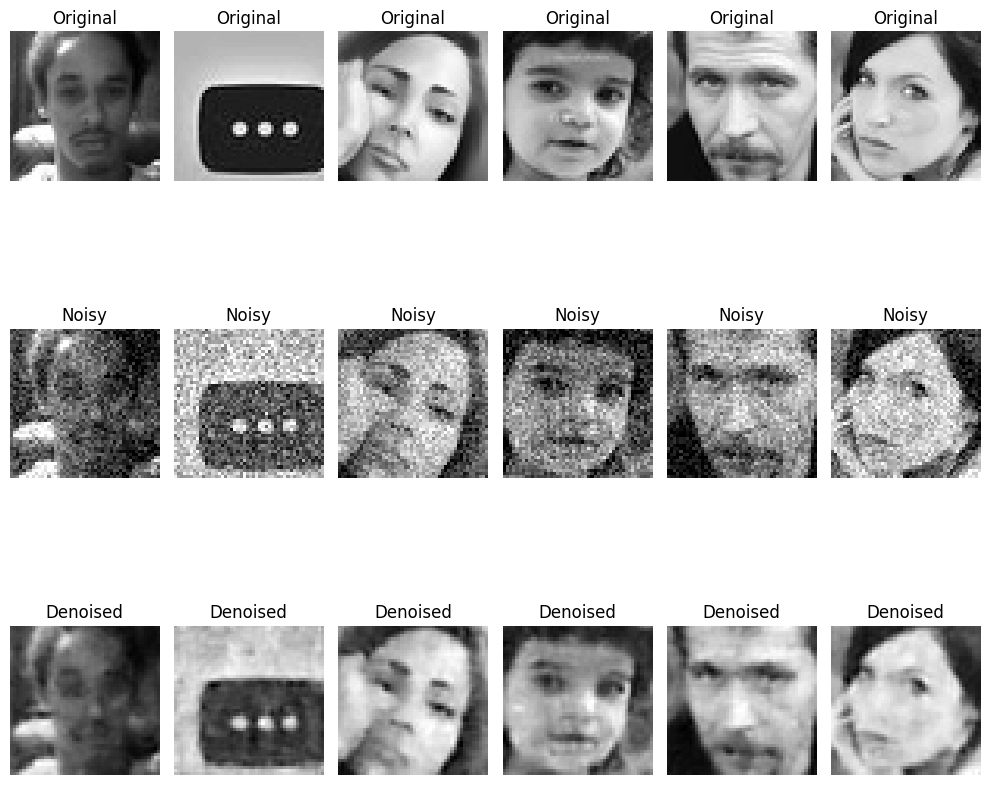

In [76]:
import matplotlib.pyplot as plt

# Number of images to display
num_images_to_display = 6

plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    # Original clean image
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(y_unseen[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title("Original")

    # Noisy image
    plt.subplot(3, num_images_to_display, i + num_images_to_display + 1)
    plt.imshow(X_unseen[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title("Noisy")

    # Denoised image
    plt.subplot(3, num_images_to_display, i + 2 * num_images_to_display + 1)
    plt.imshow(denoised_images[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title("Denoised")

plt.tight_layout()
plt.show()
